<a href="https://colab.research.google.com/github/shimon-furusato/open_test/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E6%A6%82%E8%AB%96231130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #packageをinstallするみたいな
filepath_train="/content/soldat_train.csv"
soldat_train=pd.read_csv(filepath_train)
soldat_train.head(n=5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x64,x65,x66,x67,x68,x69,x70,x71,x72,y
0,1069.500,672.192017,1.591,1.532,1593.875,879.125,446.000,183.375,94.625,46.000,...,391.500,317.750,132.375,70.625,36.125,14.25,2.125,57.200001,511.645996,-1
1,1131.750,723.656006,1.564,1.617,1768.750,1070.500,585.500,251.875,132.250,68.500,...,456.000,388.250,186.000,102.750,54.750,24.00,7.125,60.345001,534.664001,-1
2,1129.625,710.463989,1.590,1.576,1819.625,1150.375,613.250,223.750,104.375,50.125,...,514.875,414.375,160.500,74.375,37.375,20.75,7.250,60.401001,559.690979,-1
3,1139.125,719.908020,1.582,1.594,1802.875,1110.125,601.625,228.000,104.500,50.625,...,479.750,404.750,165.000,75.500,38.500,21.25,7.250,60.401001,559.690979,-1
4,1102.000,715.364990,1.540,1.633,1808.375,1089.000,589.125,231.375,103.125,50.375,...,447.375,376.000,161.375,71.750,38.750,18.50,7.875,57.508999,525.609009,-1


In [ ]:
X_train = soldat_train.iloc[:, :71].values
y_train = soldat_train["y"].values

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtc=DecisionTreeClassifier(max_depth=2)
abc=AdaBoostClassifier(base_estimator=dtc,
                       n_estimators=2000,
                       algorithm="SAMME")
abc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=2000)

In [ ]:
# テストデータの読み込み
filepath_test = "/content/soldat_test.csv"
soldat_test = pd.read_csv(filepath_or_buffer = filepath_test)
X_test = soldat_test.iloc[:, :71].values
y_test = soldat_test["y"].values

In [ ]:
pred_train, pred_test = abc.predict(X_train), abc.predict(X_test)

In [ ]:
# 訓練データの混同行列
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_train, y_pred = pred_train)

array([[2363,   48],
       [  88, 1402]])

In [ ]:
# テストデータの混同行列
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = pred_test)

array([[500,  78],
       [119, 246]])

In [ ]:
# 正答率によるモデルの評価（訓練データ）
from sklearn.metrics import accuracy_score
accuracy_score(y_true = y_train, y_pred = pred_train)

0.9651371443219687

In [ ]:
# 正答率によるモデルの評価（テストデータ）
from sklearn.metrics import accuracy_score
accuracy_score(y_true = y_test, y_pred = pred_test)

0.7910922587486744

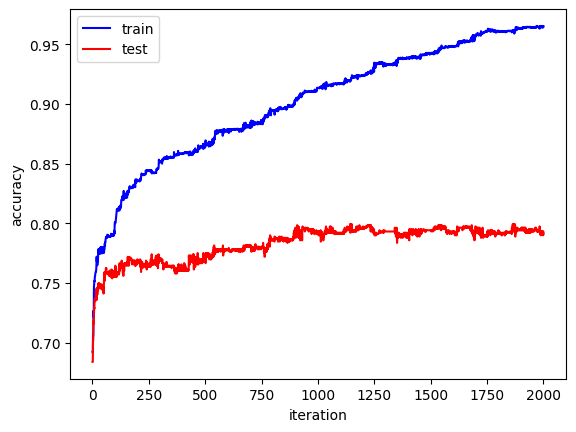

In [ ]:
# 学習曲線
import matplotlib.pyplot as plt
import numpy as np
max_iteration = 2000
train_score = np.asarray([score for score in abc.staged_score(X_train, y_train)])
test_score = np.asarray([score for score in abc.staged_score(X_test, y_test)])

plt.plot(np.arange(max_iteration) + 1, train_score, 'b-', label = "train")
plt.plot(np.arange(max_iteration) + 1, test_score, 'r-', label = "test")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend()
plt.show()

<ipython-input-32-c8c46c1d4873>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  feature_name = np.arange(1, 72).astype(np.str)


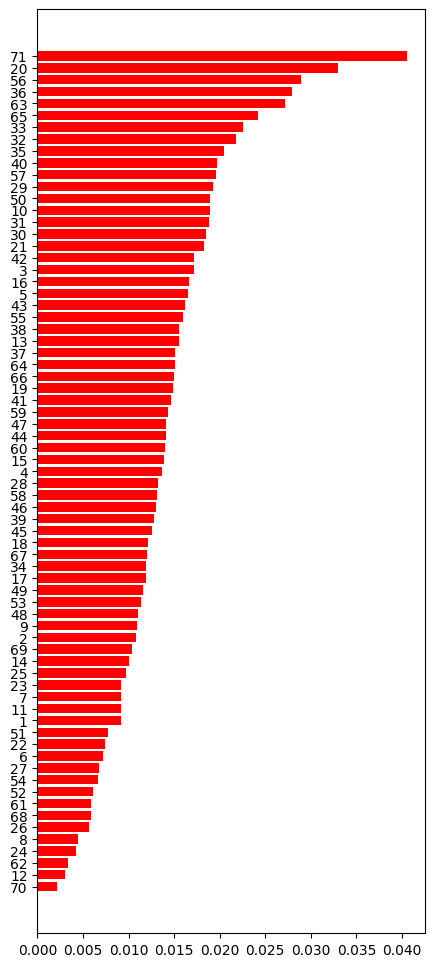

In [ ]:
# 変数重要度
importances = abc.feature_importances_
feature_name = np.arange(1, 72).astype(np.str)
indices = np.argsort(importances)
plt.figure(figsize = (5, 12))
plt.barh(np.asarray(feature_name)[indices],
         importances[indices],
         color="r",
         align="center")

plt.show()